# HACTIV8_Batch5 - Assignment 1

- Kode Peserta : PYTN-KS16-08
- Nama : Erwin Hariadi
- Datasource = https://www.kaggle.com/datasets/jboysen/london-crime

# Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you've learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough and major/minor category from Jan 2008 - Dec 2016.

This dataset contains:
- lsoa_code : represents a policing area
- borough : the london borough for which the statistic is related
- major_category : the major crime category
- minor_category : the minor crime category
- value : the count of the crime for that particular borough in that particular month
- year : the year of the summary statistic
- month : the month of the summary statistic

# Import Library

In [2]:
#mengimport library yang dibutuhkan di project ini
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
#membaca dataset
df = pd.read_csv('DATASET\london_crime_by_lsoa.csv')

In [4]:
#menampilkan data teratas dari dataset
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
#menampilkan informasi tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
#mengecek missing value dari dataset
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

# Area Plot

### 5 minor crimes dalam kurun waktu 2008-2016

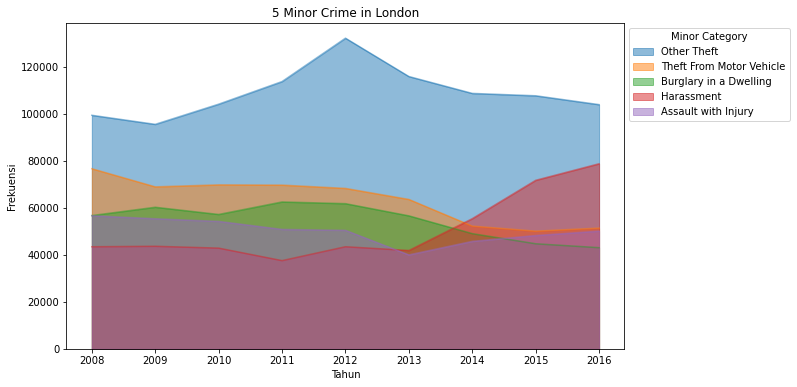

In [7]:
# Memproses table sebagai referensi area plot
filter_data = df[(df["year"] >= 2008) & (df["year"] <= 2016)]
total = filter_data.groupby('minor_category')['value'].sum().reset_index()
data_top5 = total.sort_values(by='value', ascending=False).head(5)
data_pivot = filter_data.pivot_table(index='year', columns='minor_category', values='value', aggfunc='sum')
data_pivot_top5 = data_pivot[data_top5['minor_category']]

# Visualisasi Area Plot
data_pivot_top5.plot(kind='area', stacked=False, figsize=(10, 6))
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.title('5 Minor Crime in London')
plt.legend(title='Minor Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#### Analysis
Kejahatan terbanyak pada minor_category adalah "Other Theft" dengan frekuensi kejahatan paling tinggi di tahun 2012 lalu disusul oleh "Theft From Motor Vehicle" dengan frekuensi yang menurun dari tahun 2008-2016, "Burglary in a Dweling" berada di posisi ke -3 dengan kejahatan minor_crime terbanyak lalu "Harrasment" di posisi ke -4 dan kejahatan terbanyak ke -5 adalah "Assault with injury"

# Histogram & Bar Chart

### Frekuensi kejahatan "Theft and Handling" tiap tahun

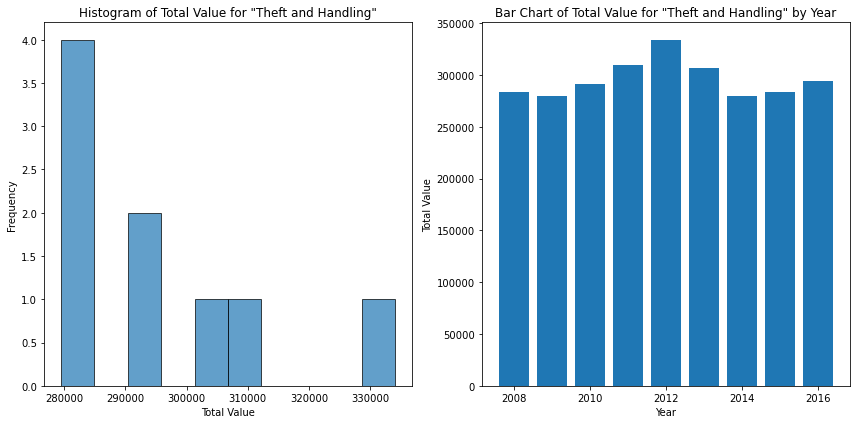

In [8]:
#Memproses data yang akan ditampilkan Histogram
filtered_data = df[df['major_category'] == 'Theft and Handling']
data = filtered_data.groupby(['year', 'major_category']).sum()
data = data.reset_index()

# Visualisasi Histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Membagi plot menjadi dua kolom
plt.hist(data['value'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.title('Histogram of Total Value for "Theft and Handling"')

# Membuat bar chart
plt.subplot(1, 2, 2)  # Plot di sebelah kanan
plt.bar(data['year'], data['value'])
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Bar Chart of Total Value for "Theft and Handling" by Year')

plt.tight_layout()  # Mengatur layout agar tidak tumpang tindih
plt.show()

#### Analysis
Frekuensi kejahatan "Theft and Handling" paling tinggi di tahun 2012 dengan total frekuensi terbanyak di 280.000 kejahatan/tahun

# Pie Chart

### Persentase Major Crime

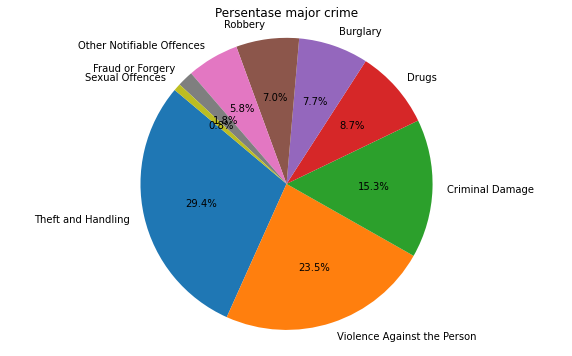

In [9]:
# Mengelompokkan data berdasarkan major_category dan menghitung jumlahnya
crime_counts = df['major_category'].value_counts()

# Data dan label untuk pie chart
labels = crime_counts.index
sizes = crime_counts.values
# Membuat pie chart tanpa explode
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Mengatur aspek menjadi lingkaran

plt.title('Persentase major crime')

plt.show()


#### Analysis
"Theft and Handling" merupakan kejahatan terbanyak di major_category yaitu sebesar 29.4% dan "Sexual Offences" merupakan kejahatan terendah di major_category dengan persentase sebesar 0.8%

# Box Plot

### Box plot berdasarkan jumlah kejahatan dengan major category

<Figure size 864x576 with 0 Axes>

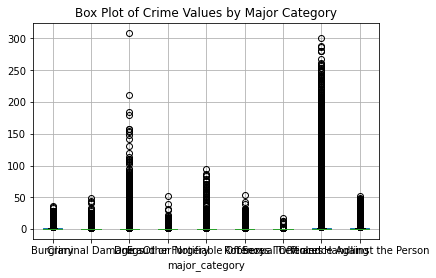

In [10]:
# Membuat box plot berdasarkan major_category
plt.figure(figsize=(12, 8))
df.boxplot(column='value', by='major_category')
plt.title('Box Plot of Crime Values by Major Category')
plt.suptitle('')  # Menghapus judul tambahan

# Menampilkan plot
plt.show()


#### Analysis
Kejahatan terbanyak dalam major category adalah "Theft and Handling"

# Scatter Plot

### Hubungan antara total kejahatan tiap tahun

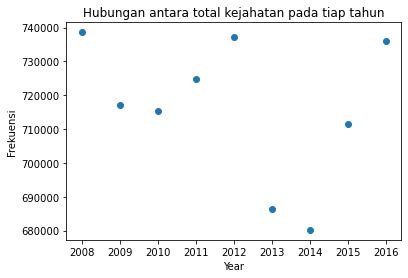

In [11]:
#Mengelompokkan data berdasarkan tahun
df_by_year = df.groupby('year')['value'].sum().reset_index()

#Membuat Scatter Plot
plt.scatter(x=df_by_year['year'], y=df_by_year['value'])

#Membuat Visualisasi
plt.xlabel('Year')
plt.ylabel('Frekuensi')
plt.title('Hubungan antara total kejahatan pada tiap tahun')
plt.show()

#### Analysis
Kejahatan terbanyak di tahun 2008 dan terendah di 2014

# Word Clouds

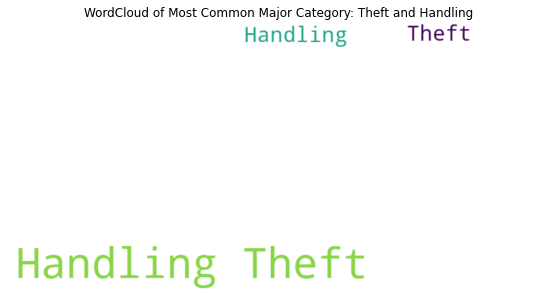

In [23]:
# Mengambil data kategori kejahatan terbanyak
most_common_major_category = df['major_category'].value_counts().idxmax()

# Membuat teks berdasarkan kategori kejahatan terbanyak
text = ' '.join(df[df['major_category'] == most_common_major_category]['major_category'])

# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"WordCloud of Most Common Major Category: {most_common_major_category}")
plt.show()


# Folium Maps

In [21]:
# Koordinat geografis untuk Croydon
croydon_coordinates = [51.376165, -0.098234]

# Membuat peta
maps = folium.Map(location=croydon_coordinates, zoom_start=13)  # Zoom level dapat disesuaikan

# Menambahkan marker untuk Croydon
folium.Marker(
    location=croydon_coordinates,
    popup="Croydon",
    icon=folium.Icon(color='blue')
).add_to(maps)

# Menampilkan peta
maps


# Overall Analysis

Berdasarkan analisis dataset diatas kejahatan major_category "Theft and Handling" merupakan kejahatan yang paling banyak terjadi pada tahun 2008-2016, yaitu sebesar 29.4% dan kejahatan paling rendah adalah "Sexual Offence" dengan persentase 0.8%

Untuk kejahatan minor_category paling banyak adalah "Other Theft".
Kejahatan yang paling banyak terjadi pada tahun 2008 dan paling rendah di tahun 2014

Tahun dengan kejahatan paling tinggi adalah di tahun 2012